In [1]:
from src.options.opt import Opt
from src.data import create_dataloader
from torch_geometric.data import DataLoader
from src.models import Model
from src.util.retriever import Retriever
import numpy as np
import torch


In [2]:
opt = Opt() 
retriever = Retriever(opt)
dataloader, dataset = create_dataloader(opt, 'database')

device = torch.device('cuda:{}'.format(opt.gpu_ids[0]))\
    if (opt.gpu_ids and torch.cuda.is_available())\
    else torch.device('cpu')

model = Model(opt, device, phase='retrieval')

loaded mean / std from cache
loading the model from ./checkpoints\MCBB_ae_knn_chamfer_5\latest_net.pth


## Extract features for the database

In [3]:
fea_db = retriever.extract_database_features(model, dataset)

## Set query set

In [4]:
query_namelist =  ['test/gear/00070120.obj', 'test/gear/00000219.obj', 'test/motor/00053644.obj', 'test/motor/00064756.obj', 'test/pin/00052497.obj', 'test/pin/00052388.obj', 'test/rotor/00067691.obj', 'test/rotor/00067746.obj', 'test/washer/00040300.obj', 'test/washer/00041575.obj']
query_idx = []
for name in query_namelist:
    query_idx += [dataset.paths.index(opt.dataroot + name)]
query_idx

[951, 942, 912, 907, 976, 963, 921, 938, 998, 993]

## Test retrieval results of single examples

In [5]:
query_set = dataset[query_idx]
fea_q = fea_db[query_idx, :]

In [6]:
dist, ranked_list, dissm = retriever.retrieve(model, query_set, dataset, fea_db, fea_q)

In [7]:
ranked_list['IndexFlatL2'] = ranked_list['IndexFlatL2'][:, 1:]
dissm['IndexFlatL2'] = dissm['IndexFlatL2'][:, 1:]

D:\anaconda3\envs\torchgeo\lib\site-packages\pyvista\jupyter\notebook.py:56: UserWarning: Failed to use notebook backend: 

DLL load failed while importing vtkFiltersGeneric: 内存资源不足，无法处理此命令。

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


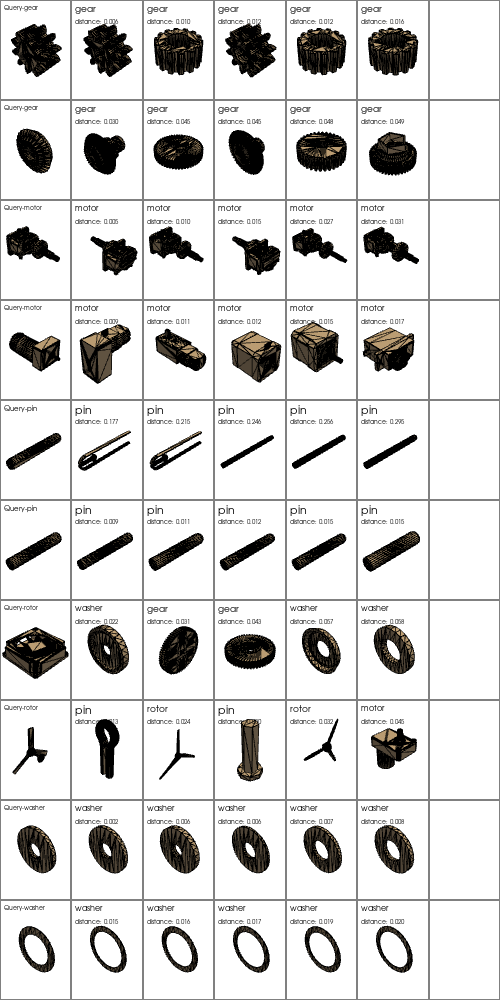

In [8]:
retriever.show_results(query_idx, ranked_list, dataset.pp_paths, dataset.pp_paths, dissm)

In [9]:
opt.name = 'MCBB_cls_5_knn'
opt.arch = 'mesh_cls'
opt.which_layer = 'gb_pool'
opt.pooling = 'None'
retriever = Retriever(opt)
dataloader, dataset = create_dataloader(opt, 'database')

device = torch.device('cuda:{}'.format(opt.gpu_ids[0]))\
    if (opt.gpu_ids and torch.cuda.is_available())\
    else torch.device('cpu')

model = Model(opt, device, phase='retrieval')

loaded mean / std from cache
loading the model from ./checkpoints\MCBB_cls_5_knn\latest_net.pth


In [10]:
fea_db = retriever.extract_database_features(model, dataset)

In [11]:
query_set = dataset[query_idx]
fea_q = fea_db[query_idx, :]
dist, ranked_list, dissm = retriever.retrieve(model, query_set, dataset, fea_db, fea_q)
ranked_list['IndexFlatL2'] = ranked_list['IndexFlatL2'][:, 1:]
dissm['IndexFlatL2'] = dissm['IndexFlatL2'][:, 1:]

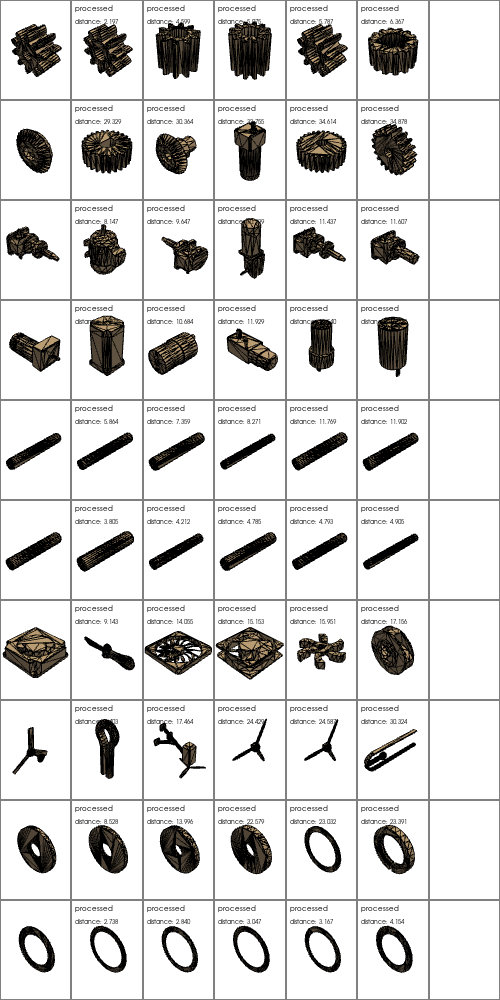

In [13]:
retriever.show_results(query_idx, ranked_list, dataset.pp_paths, dataset.pp_paths, dissm)